### Confidence Intervals

We have the full dataset and we'll make a reduced versions of the data.  
The reduced version is a sample.  While the full data is a population.

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

coffee_full = pd.read_csv('coffee_dataset.csv') #population
coffee_red = coffee_full.sample(200) #sample

In [2]:
coffee_red.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


`1.` Proportion of coffee drinkers in the sample. Proportion of individuals that don't drink coffee.

In [9]:
print('Proportion of coffee drinkers in the sample is {}'.format(coffee_red.drinks_coffee.mean()))

Proportion of coffee drinkers in the sample is 0.595


In [12]:
print("Proportion of individuals that don't drink coffee is {}".format(1-coffee_red.drinks_coffee.mean()))

Proportion of individuals that don't drink coffee is 0.405


`2.` Average height of the individuals who drink coffee and average height of the individuals who do not drink coffee.

In [15]:
print("Average height of the individuals who drink coffee is {}".format(coffee_red.query('drinks_coffee')['height'].mean()))

Average height of the individuals who drink coffee  is 68.11962990858616


In [16]:
print("Average height of the individuals who don't drink coffee is {}".format(coffee_red.query('not drinks_coffee')['height'].mean()))

Average height of the individuals who don't drink coffee is 66.78492279927877


`3.` 200 "new" simulated individuals from original sample of 200. Proportion of coffee drinkers in bootstrap sample and individuals that don't drink coffee.

In [24]:
bootstrap_sample_200=np.random.choice(coffee_red['drinks_coffee'], size=200)

In [26]:
print('Proportion of coffee drinkers is {}'.format(bootstrap_sample_200.mean()))
print('Proportion of individuals that don\'t drink coffee is {}'.format(1-bootstrap_sample_200.mean()))

Proportion of coffee drinkers is 0.62
Proportion of individuals that don't drink coffee is 0.38


`4.` Simulation of 10,000 bootstrap samples, taking the mean height of the non-coffee drinkers in each sample. 
Ploting the distribution, and pulling the values necessary for a 95% confidence interval.

In [38]:
boot_means_height = []
boot_means = []
for _ in range(10000):
    bootsample = coffee_red.sample(200, replace=True)
    boot_means.append(bootsample['drinks_coffee'].mean())
    boot_means_height.append(bootsample[bootsample['drinks_coffee']==False]['height'].mean())

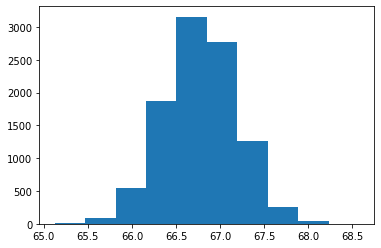

In [39]:
import matplotlib.pyplot as plt
plt.hist(boot_means_height);

In [46]:
# Here we can check if our interval is captured the actual average height of non-coffee drinkers in the population
np.percentile(boot_means_height, 2.5), np.percentile(boot_means_height, 97.5)

(65.984792190363, 67.57053075333545)

In [43]:
np.array(boot_means).mean()

0.5956809999999999

In [45]:
np.array(boot_means_height).mean()

66.78223193026263